In [111]:
import pandas as pd
import numpy as np
import umap
import scanpy as sc

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

## scRNAseq data

In [112]:
data = pd.read_csv('../data/scrnaseq/test_mat.csv', sep=',', header=0, index_col=0)

In [113]:
meta = pd.read_csv('../data/scrnaseq/meta_data_smartseq2.csv', sep=',', header=0, index_col=0)

In [114]:
meta.head()

,nnet2,ident,technology
cell,,,
SMARTseqFINAL_allLanes_AACATCCGAAGAGAGG,NK cells,NK cells,Smart-Seq2
SMARTseqFINAL_allLanes_AACATCCGCAGTATCG,NK cells,NK cells,Smart-Seq2
SMARTseqFINAL_allLanes_AACATCCGCCTCCTAA,B cells,B cells,Smart-Seq2
SMARTseqFINAL_allLanes_AACATCCGCGAATCTG,NK cells,NK cells,Smart-Seq2
SMARTseqFINAL_allLanes_AACATCCGCGCCTATA,NK cells,NK cells,Smart-Seq2


In [115]:
data.head()

,SMARTseqFINAL_allLanes_AACATCCGAAGAGAGG,SMARTseqFINAL_allLanes_AACATCCGCAGTATCG,SMARTseqFINAL_allLanes_AACATCCGCCTCCTAA,SMARTseqFINAL_allLanes_AACATCCGCGAATCTG,SMARTseqFINAL_allLanes_AACATCCGCGCCTATA,SMARTseqFINAL_allLanes_AACATCCGCGGAAGAA,SMARTseqFINAL_allLanes_AACATCCGCGGCATTA,SMARTseqFINAL_allLanes_AACATCCGCTATGTGG,SMARTseqFINAL_allLanes_AACATCCGGAATCCAG,SMARTseqFINAL_allLanes_AACATCCGGAGGAGAA,...,SMARTseqFINAL_allLanes_TTGTCGTGCCTGAGAA,SMARTseqFINAL_allLanes_TTGTCGTGCTAAGCAG,SMARTseqFINAL_allLanes_TTGTCGTGGACACCAA,SMARTseqFINAL_allLanes_TTGTCGTGGCGACTAA,SMARTseqFINAL_allLanes_TTGTCGTGGCTTGCTA,SMARTseqFINAL_allLanes_TTGTCGTGGTGAGGAA,SMARTseqFINAL_allLanes_TTGTCGTGGTTGACCA,SMARTseqFINAL_allLanes_TTGTCGTGTCGTGGTA,SMARTseqFINAL_allLanes_TTGTCGTGTCTCGGAA,SMARTseqFINAL_allLanes_TTGTCGTGTGATCCGA
TSPAN6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,3.186911,0.0,0.0,0.000000
DPM1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.701919,...,0.0,0.000000,0.0,3.222570,0.0,0.0,2.337225,0.0,0.0,0.000000
SCYL3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,1.009579,0.0,0.0,0.000000
C1orf112,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
FGR,0.0,3.710542,3.304465,4.164365,1.621903,3.442635,0.0,0.0,0.0,0.000000,...,0.0,4.441022,0.0,2.233954,0.0,0.0,0.000000,0.0,0.0,3.087333


In [116]:
data = data[meta.index]

In [117]:
fil = meta['nnet2'] != 'HEK cells'
meta = meta[fil]
data = data[data.columns[fil]]

In [118]:
data = data[data.mean(1) != 0]

In [119]:
data.shape

(17021, 623)

In [120]:
#using Umap
model = umap.UMAP()

In [121]:
data_umap = model.fit_transform(data.T)

In [122]:
data_umap = pd.DataFrame(data_umap, index=data.columns, columns=['UMAP1', 'UMAP2'])

In [123]:
data_umap = data_umap.loc[meta.index]

In [124]:
data_umap['Cell'] = meta.loc[data_umap.index, 'nnet2']

In [125]:
data_umap.head()

,UMAP1,UMAP2,Cell
cell,,,
SMARTseqFINAL_allLanes_AACATCCGAAGAGAGG,-0.857418,11.831481,NK cells
SMARTseqFINAL_allLanes_AACATCCGCAGTATCG,-1.613946,11.648443,NK cells
SMARTseqFINAL_allLanes_AACATCCGCCTCCTAA,2.482719,0.799955,B cells
SMARTseqFINAL_allLanes_AACATCCGCGAATCTG,-0.609102,11.741214,NK cells
SMARTseqFINAL_allLanes_AACATCCGCGCCTATA,-1.053558,11.876027,NK cells


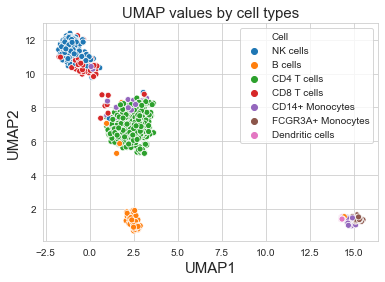

In [166]:
#plotting UMAP values by cell types
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Cell'])
plt.xlabel('UMAP1', size=15)
plt.ylabel('UMAP2', size=15)
plt.title('UMAP values by cell types', size=15)
plt.savefig('../pictures/UMAP1')

In [1]:
data_umap['Expression'] = data.loc['IL2']

NameError: name 'data' is not defined

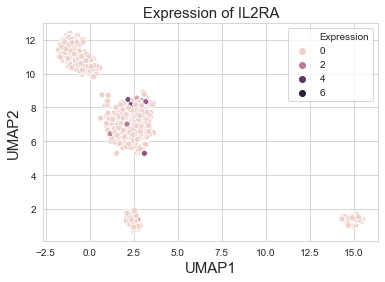

In [167]:
#plotting UMAP values by expression
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Expression'])
plt.title('Expression of IL2RA', size=15)
plt.xlabel('UMAP1', size=15)
plt.ylabel('UMAP2', size=15)
plt.savefig('../pictures/expr_of_IL2RA')

## scRNAseq on NicheNet

In [134]:
#Importing the scRNAseq data preprocessed in R (file name= scRNAseq_NN.R)
nn = pd.read_csv('../results/nn_scrnaseq_scaled.csv', sep=',', header=0, index_col=0)

In [135]:
#Importing the NicheNet model
nn_model = pd.read_csv('../data/ligand_target_matrix.csv', sep=',', header=0, index_col=0)

In [136]:
common_genes = list(set(nn.index) & set(nn_model.index))

In [137]:
#Correlating the 2 matrices
nn_score = pd.concat([nn_model.loc[common_genes], nn.loc[common_genes]], 1).corr()

In [138]:
nn_activity = nn_score.loc[nn_model.columns, nn.columns]

2 way standardisation

In [139]:
nn_activity_norm = ((nn_activity.T - nn_activity.mean(1)) / nn_activity.std(1)).T

In [140]:
nn_activity_norm = (nn_activity_norm - nn_activity_norm.mean()) / nn_activity_norm.std()

In [205]:
ligand = 'IL12A'
data_umap['Activity_NN'] = nn_activity_norm.loc[ligand]

In [206]:
data_umap['Expression'] = data.loc['IL12A']

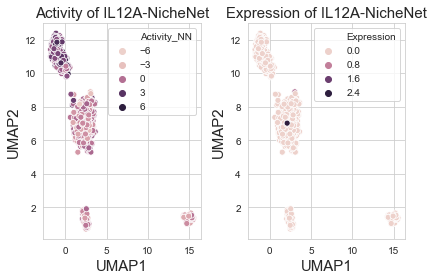

In [211]:
#Plotting the NicheNet receptor activity 
plt.subplot(121)
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Activity_NN'])
plt.title('Activity of IL12A-NicheNet', size=15)
plt.xlabel('UMAP1', size=15)
plt.ylabel('UMAP2', size=15)
plt.tight_layout()

#Plotting the NicheNet expression 
plt.subplot(122)
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Expression'])
plt.title('Expression of IL12A-NicheNet', size=15)
plt.xlabel('UMAP1', size=15)
plt.ylabel('UMAP2', size=15)
plt.tight_layout()
plt.savefig('../pictures/IL12A_NN')

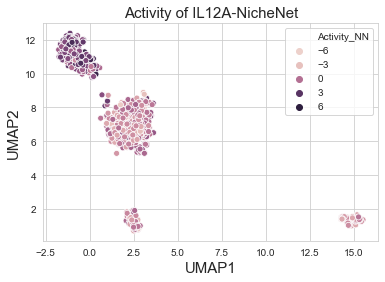

In [212]:
#Plotting the NicheNet receptor activity 
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Activity_NN'])
plt.title('Activity of IL12A-NicheNet', size=15)
plt.xlabel('UMAP1', size=15)
plt.ylabel('UMAP2', size=15)
plt.savefig('../pictures/activity_of_IL12A_NN')

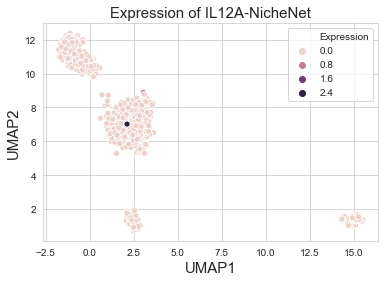

In [213]:
#Plotting the NicheNet expression 
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Expression'])
plt.title('Expression of IL12A-NicheNet', size=15)
plt.xlabel('UMAP1', size=15)
plt.ylabel('UMAP2', size=15)
plt.savefig('../pictures/expr_of_IL12A_NN')

In [146]:
#Getting the average activity of the receptors
average_activity = nn_activity_norm.T
average_activity['Cell_type'] = meta.loc[nn_activity_norm.columns, 'nnet2']
average_activity = average_activity.groupby('Cell_type').mean()

In [147]:
average_activity.loc['CD8 T cells'].sort_values(ascending=False)

IL2         1.981231
IL12A       1.649399
IL12B       1.582466
IL15        1.369889
TGFB1       1.256119
              ...   
CCL15      -0.759910
NDP        -0.772356
SERPINC1   -0.778733
TENM3      -0.979656
CLDN24           NaN
Name: CD8 T cells, Length: 688, dtype: float64

In [148]:
#Getting the top5 active receptors in NicheNet for each cell type
top5_nn= pd.DataFrame(columns=['1', '2', '3', '4','5'], index=list(average_activity.index.unique()))
top5_nn

,1,2,3,4,5
B cells,NaN,NaN,NaN,NaN,NaN
CD14+ Monocytes,NaN,NaN,NaN,NaN,NaN
CD4 T cells,NaN,NaN,NaN,NaN,NaN
CD8 T cells,NaN,NaN,NaN,NaN,NaN
Dendritic cells,NaN,NaN,NaN,NaN,NaN
FCGR3A+ Monocytes,NaN,NaN,NaN,NaN,NaN
NK cells,NaN,NaN,NaN,NaN,NaN


In [149]:
for i in average_activity.index:
    top5_nn.loc[i]=list(average_activity.loc[i].sort_values(ascending=False).head(5).index)

In [150]:
top5_nn

,1,2,3,4,5
B cells,ASIP,TNFSF13B,HLA-G,DKK2,EGF
CD14+ Monocytes,IL1A,IL1B,F2,NLGN2,AGT
CD4 T cells,IGF1,IL17C,INS,NLGN3,PTDSS1
CD8 T cells,IL2,IL12A,IL12B,IL15,TGFB1
Dendritic cells,THBS4,PCDHB16,PCDH20,WNT7A,INHBE
FCGR3A+ Monocytes,IL1B,IFNA13,IFNA1,CCL3,TNF
NK cells,IL2,IL15,IL12A,TGFB1,IL21


In [46]:
top5_nn.to_csv('../results/top5_nichenet_rec.csv', sep=',')

## scRNAseq on LINCS

In [151]:
#Importing the ligand perturbation LINCS data
lincs=pd.read_csv('../results/consensus_signature_gse92742_trt_lig.csv', sep=',', header=0, index_col=0)
lincs=lincs.T

In [152]:
lincs.head()

,ADM,AGT,ANGPT1,ANGPT2,ANGPT4,APLN,APOE,AREG,ARTN,AVP,...,UTS2,VEGFA,VEGFB,VEGFC,VIP,VTN,WNT1,XCL1,IL17A,IFNA2
DDR1,-0.311746,0.328147,-0.290770,0.681153,-0.105004,0.290904,0.211712,0.053174,0.187789,0.279418,...,0.396761,0.413950,0.108714,-0.006694,1.221195,0.391628,0.344205,0.302420,0.156113,0.122696
PAX8,-0.598979,0.187768,0.331472,-0.265093,0.168645,-0.044158,0.551838,0.199567,-0.004982,0.174167,...,0.390771,-0.283967,0.124826,0.015059,0.107968,-0.014858,0.070973,-0.108537,0.064737,-0.582232
RPS5,0.279604,-0.214431,0.041328,0.158823,-0.413267,-0.199525,-0.293629,0.110433,0.317544,-0.239516,...,-0.114810,-0.241148,0.117850,0.020890,-0.232517,0.369823,0.627918,0.206093,-0.158104,0.574131
ABCF1,-0.713548,0.387740,-0.156881,0.164295,-0.507766,0.168712,-0.117965,-0.442779,-0.316651,-0.049654,...,-0.104671,0.133034,-0.736458,-0.150523,0.052420,0.382225,-0.388378,-0.119838,-0.149376,-0.702036
SPAG7,-1.766061,0.104206,-0.040080,0.143002,-0.695529,0.048788,0.073540,0.219238,-0.037445,-0.031229,...,-0.347993,0.401141,-0.317175,-0.096045,0.480370,0.046199,-0.360219,-0.773374,0.054229,-0.110045


In [153]:
common_genes = list(set(nn.index) & set(lincs.index))
len(common_genes)

907

In [154]:
#correlating the 2 matrices
lincs_score = pd.concat([lincs.loc[common_genes], nn.loc[common_genes]], 1).corr()

In [155]:
lincs_activity = lincs_score.loc[lincs.columns, nn.columns]

2 way standardisation

In [156]:
lincs_activity_norm = ((lincs_activity.T - lincs_activity.mean(1)) / lincs_activity.std(1)).T

In [157]:
lincs_activity_norm = (lincs_activity_norm - lincs_activity_norm.mean()) / lincs_activity_norm.std()

In [215]:
ligand = 'IL24'
data_umap['Activity_LINCS'] = lincs_activity_norm.loc[ligand]

In [216]:
data_umap['Expression'] = data.loc['IL24']

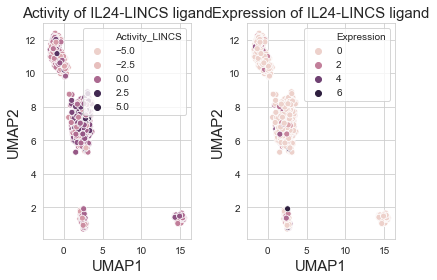

In [217]:
#Plotting the LINCS receptor activity 
plt.subplot(121)
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Activity_LINCS'])
plt.title('Activity of IL24-LINCS ligand', size=15)
plt.xlabel('UMAP1', size=15)
plt.ylabel('UMAP2', size=15)
plt.tight_layout()

#Plotting the LINCS expression 
plt.subplot(122)
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Expression'])
plt.title('Expression of IL24-LINCS ligand', size=15)
plt.xlabel('UMAP1', size=15)
plt.ylabel('UMAP2', size=15)
plt.tight_layout()
plt.savefig('../pictures/IL21_LINCS')

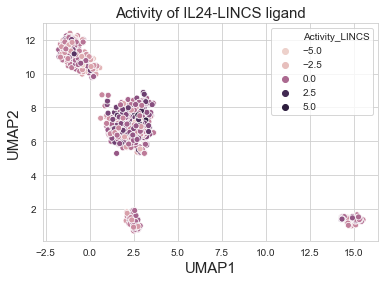

In [218]:
#Plotting the LINCS receptor activities
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Activity_LINCS'])
plt.title('Activity of IL24-LINCS ligand', size=15)
plt.xlabel('UMAP1', size=15)
plt.ylabel('UMAP2', size=15)
plt.savefig('../pictures/expr_of_IL24_LINCS')

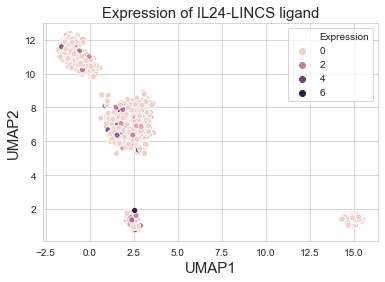

In [219]:
#Plotting the LINCS expression
sns.scatterplot(x=data_umap['UMAP1'], y=data_umap['UMAP2'], hue=data_umap['Expression'])
plt.title('Expression of IL24-LINCS ligand', size=15)
plt.xlabel('UMAP1', size=15)
plt.ylabel('UMAP2', size=15)
plt.savefig('../pictures/expr_of_IL24_LINCS')

In [105]:
##Getting the average activity of the receptors
average_activity = lincs_activity_norm.T
average_activity['Cell_type'] = meta.loc[lincs_activity_norm.columns, 'nnet2']
average_activity = average_activity.groupby('Cell_type').mean()

In [106]:
average_activity.loc['CD8 T cells'].sort_values().head(5)

IL24    -0.471722
BMP10   -0.442018
EDN1    -0.418779
IL22    -0.359740
PDGFC   -0.357713
Name: CD8 T cells, dtype: float64

In [107]:
#Getting the top5 active receptors in LINCS_ligand for each cell type
top5_lincs= pd.DataFrame(columns=['1', '2', '3', '4','5'], index=list(average_activity.index.unique()))
top5_lincs

,1,2,3,4,5
B cells,NaN,NaN,NaN,NaN,NaN
CD14+ Monocytes,NaN,NaN,NaN,NaN,NaN
CD4 T cells,NaN,NaN,NaN,NaN,NaN
CD8 T cells,NaN,NaN,NaN,NaN,NaN
Dendritic cells,NaN,NaN,NaN,NaN,NaN
FCGR3A+ Monocytes,NaN,NaN,NaN,NaN,NaN
NK cells,NaN,NaN,NaN,NaN,NaN


In [108]:
for i in average_activity.index:
    top5_lincs.loc[i]=list(average_activity.loc[i].sort_values(ascending=False).head(5).index)

In [109]:
top5_lincs

,1,2,3,4,5
B cells,CXCL1,CCL1,SPP1,LTA,SERPINC1
CD14+ Monocytes,IL1A,TNF,AGT,LTA,FGF6
CD4 T cells,IL24,PSPN,CCL26,CXCL10,ARTN
CD8 T cells,EPO,FGF22,VTN,TNFRSF1A,FN1
Dendritic cells,CXCL1,GHRH,BMP4,CXCL16,IL1A
FCGR3A+ Monocytes,FGF6,ADM,IFNG,IL1A,IL13
NK cells,TGFB3,AREG,FN1,NPPA,VEGFC


In [61]:
top5_lincs.to_csv('../results/top5_lincs_rec.csv', sep=',')